# 1. 데이터 수집

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam
import datetime

In [6]:
data1 = pd.read_csv('C:/Users/hjmin/OneDrive/바탕 화면/TOY_PROJECT/STOCK/TSLA.csv')
data2 = pd.read_csv('C:/Users/hjmin/OneDrive/바탕 화면/TOY_PROJECT/STOCK/samsung.csv')
data3 = pd.read_csv('C:/Users/hjmin/OneDrive/바탕 화면/TOY_PROJECT/STOCK/hyundai.csv')

In [8]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-24,17.590000,17.688000,17.200001,17.243999,17.243999,160912500
1,2019-04-25,17.000000,17.266666,16.404667,16.508667,16.508667,327741000
2,2019-04-26,16.433332,16.445333,15.408667,15.676000,15.676000,335410500
3,2019-04-29,15.724000,16.265333,15.478000,16.098000,16.098000,250717500
4,2019-04-30,16.137333,16.280666,15.800000,15.912667,15.912667,141969000


In [12]:
data1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2024-04-17,157.639999,158.330002,153.779999,155.449997,155.449997,82439700
1255,2024-04-18,151.250000,152.199997,148.699997,149.929993,149.929993,96098800
1256,2024-04-19,148.970001,150.940002,146.220001,147.050003,147.050003,86005100
1257,2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
1258,2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,106808100


In [9]:
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-24,45400.0,45650.0,44150.0,44750.0,39312.886719,13299267
1,2019-04-25,44250.0,45000.0,44100.0,44650.0,39225.039063,10868965
2,2019-04-26,44200.0,45000.0,43800.0,44850.0,39400.734375,9739982
3,2019-04-29,45150.0,46150.0,45100.0,46150.0,40542.785156,8777517
4,2019-04-30,46000.0,46300.0,45350.0,45850.0,40279.230469,11121273


In [11]:
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-24,139000.0,140000.0,136000.0,138500.0,117322.187500,1394398
1,2019-04-25,138500.0,139000.0,136500.0,138000.0,116898.648438,598551
2,2019-04-26,138000.0,138500.0,134500.0,135500.0,114780.914063,657701
3,2019-04-29,136500.0,139500.0,136500.0,139000.0,117745.726563,758885
4,2019-04-30,139500.0,140500.0,138000.0,138500.0,117322.187500,623895


# 2. 데이터 전처리

고가, 저가, 고가와 저가의 중간 값, 고가와 저가의 80% 값 저장

In [19]:
# 테슬라
high_price1 = data1['High'].values
low_price1 = data1['Low'].values
mid_price1 = (high_price1 + low_price1)/2
eight_price1 = (high_price1 + low_price1)*0.8

In [20]:
# 삼성전자
high_price2 = data2['High'].values
low_price2 = data2['Low'].values
mid_price2 = (high_price2 + low_price2)/2
eight_price2 = (high_price2 + low_price2)*0.8

In [21]:
# 현대자동차
high_price3 = data3['High'].values
low_price3 = data3['Low'].values
mid_price3 = (high_price3 + low_price3)/2
eight_price3 = (high_price3 + low_price3)*0.8

window size를 설정해야 한다. 이 프로젝트를 하는 이유가 사실 지금 다른 프로젝트를 하면서 이 개념을 공부해보려고이기 때문이다.
나는 window size를 30일로 설정할 것이다.
최근 30일 간의 데이터를 통해 내일의 주가를 예측하는 의미이다. 이 window size는 주식 종류, 데이터 특징 등에 따라 다르게 설정해야 하며, window size 설정을 위한 여러가지 방법론이 있지만 여기서는 30으로 통일할 예정이다.

In [22]:
# window size : 최근 30일
seq_len = 30
sequence_length = seq_len + 1 

In [24]:
# 테슬라
result1_tsla = []
for index in range(len(mid_price1) - sequence_length):
    result1_tsla.append(mid_price1[index: index + sequence_length])

result2_tsla = []
for index in range(len(eight_price1) - sequence_length):
    result2_tsla.append(eight_price1[index: index + sequence_length])

In [25]:
# 삼성전자
result1_ss = []
for index in range(len(mid_price2) - sequence_length):
    result1_ss.append(mid_price2[index: index + sequence_length])

result2_ss = []
for index in range(len(eight_price2) - sequence_length):
    result2_ss.append(eight_price2[index: index + sequence_length])

In [26]:
# 현대자동차
result1_hd = []
for index in range(len(mid_price3) - sequence_length):
    result1_hd.append(mid_price3[index: index + sequence_length])

result2_hd = []
for index in range(len(eight_price3) - sequence_length):
    result2_hd.append(eight_price3[index: index + sequence_length])

# 3. 정규화

In [30]:
# 테슬라
normal_data1 = []
for window in result1_tsla:
    normal_window1 = [((float(p) / float(window[0]))-1) for p in window]
    normal_data1.append(normal_window1)

result1 = np.array(normal_data1)

# split train set, test set
row1 = int(round(result1.shape[0]*0.9)) 
train1 = result1[:row1, :]
np.random.shuffle(train1)

x_train1 = train1[:, :-1] 
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
y_train1 = train1[:, -1]

x_test1 = result1[row1:, :-1]
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))
y_test1 = result1[row1:, -1]

x_train1.shape, x_test1.shape

((1105, 30, 1), (123, 30, 1))

In [33]:
# 삼성전자 
normal_data2 = []
for window in result1_ss:
    normal_window2 = [((float(p) / float(window[0]))-1) for p in window]
    normal_data2.append(normal_window2)

result2 = np.array(normal_data2)

# split train set, test set
row2 = int(round(result2.shape[0]*0.9)) 
train2 = result2[:row2, :]
np.random.shuffle(train2)

x_train2 = train2[:, :-1] 
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
y_train2 = train2[:, -1]

x_test2 = result2[row2:, :-1]
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
y_test2 = result2[row2:, -1] 

x_train2.shape, x_test2.shape

((1082, 30, 1), (120, 30, 1))

In [36]:
# 현대자동차
normal_data3 = []
for window in result1_hd:
    normal_window3 = [((float(p) / float(window[0]))-1) for p in window]
    normal_data3.append(normal_window3)

result3 = np.array(normal_data3)

# split train set, test set
row3 = int(round(result3.shape[0]*0.9)) 
train3 = result3[:row3, :]
np.random.shuffle(train3) 

x_train3 = train3[:, :-1] 
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
y_train3 = train3[:, -1]

x_test3 = result3[row3:, :-1] 
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))
y_test3 = result3[row3:, -1] 

x_train3.shape, x_test3.shape

((1082, 30, 1), (120, 30, 1))

# 4. LSTM 모델링

In [53]:
# 테슬라
# model = Sequential()
# model.add(LSTM(30, return_sequences=True, input_shape=(30,1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(1, activation='linear'))

# model.compile(loss='mse', optimizer='rmsprop')
# model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 30, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 64)                  │          24,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,225 (110.25 KB)

 Trainable params: 28,225 (110.25 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# input_tensor = Input(shape=(30,1))

# x = LSTM(30, return_sequences=True)(input_tensor)
# x = LSTM(64, return_sequences=False)(x)
# output = Dense(1, activation='linear')(x)

# model = Model(inputs=input_tensor, outputs=output)

# model.compile(loss='mse', optimizer=Adam(0.01))
# model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 30, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 64)                  │          24,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,225 (110.25 KB)

 Trainable params: 28,225 (110.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model = Sequential()
model.add(LSTM(30, return_sequences=True, input_shape=(30, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=Adam(0.01))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 30, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 64)                  │          24,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,225 (110.25 KB)

 Trainable params: 28,225 (110.25 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model = Sequential()

model.add(Input(shape=(30, 1)))

# 유닛 수를 50으로 증가
model.add(LSTM(50, return_sequences=True))

# Dropout 레이어 추가하여 과적합 방지
model.add(Dropout(0.2))

# 두 번째 LSTM 레이어 추가 : 유닛 수를 100으로 증가
model.add(LSTM(100, return_sequences=True))  
model.add(Dropout(0.2))

# 세 번째 LSTM 레이어, return_sequences는 마지막 LSTM이므로 False
model.add(LSTM(100, return_sequences=False))  # 유닛 수 유지
model.add(Dropout(0.2))  # 세 번째 Dropout 레이어 추가

# Dense 레이어를 추가하여 모델 출력 생성
model.add(Dense(1, activation='linear'))

# 손실 함수 mse, 옵티마이저 Adam
model.compile(loss='mse', optimizer=Adam(0.001))  # 학습률 0.001

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 30, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,301 (591.02 KB)

 Trainable params: 151,301 (591.02 KB)

 Non-trainable params: 0 (0.00 B)

# 5. 훈련 및 예측

In [65]:
# 테슬라
model.fit(x_train1, y_train1,
         validation_data=(x_test1, y_test1),
         batch_size=10, epochs=50)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0296 - val_loss: 0.0034
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0091 - val_loss: 0.0020
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0083 - val_loss: 0.0021
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0071 - val_loss: 0.0021
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0059 - val_loss: 0.0012
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0052 - val_loss: 0.0018
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0049 - val_loss: 0.0011
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0041 - val_loss: 0.0013
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step


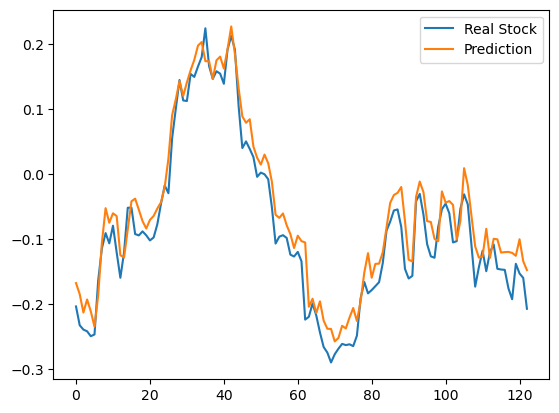

In [66]:
pred1 = model.predict(x_test1)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test1, label='Real Stock')
ax.plot(pred1, label='Prediction')
ax.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


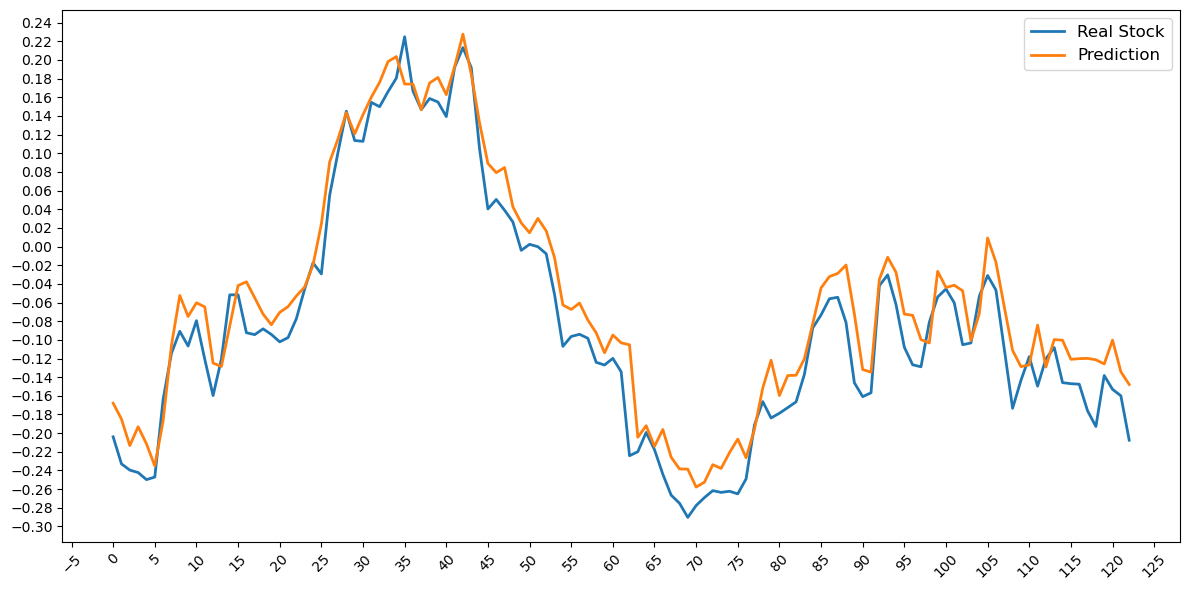

In [67]:
pred1 = model.predict(x_test1)

fig = plt.figure(facecolor='white', figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(y_test1, label='Real Stock', linewidth=2)
ax.plot(pred1, label='Prediction', linewidth=2)
ax.legend(fontsize='large')

ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.yaxis.set_major_locator(plt.MaxNLocator(30))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


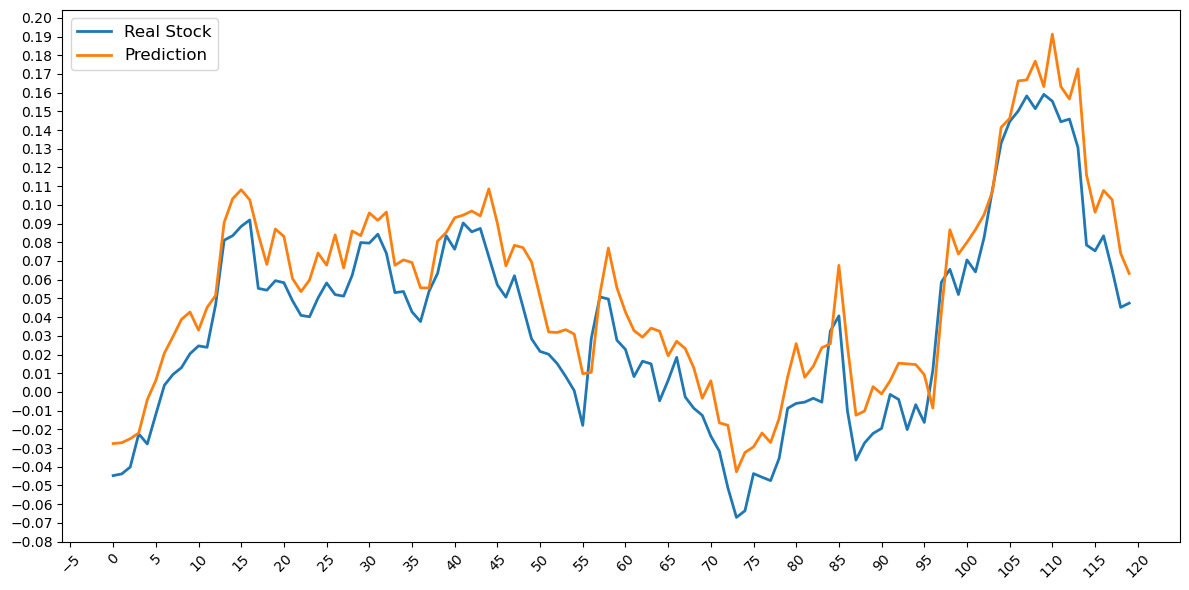

In [74]:
# 삼성
pred2 = model.predict(x_test2)

fig = plt.figure(facecolor='white', figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(y_test2, label='Real Stock', linewidth=2)
ax.plot(pred2, label='Prediction', linewidth=2)
ax.legend(fontsize='large')

ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.yaxis.set_major_locator(plt.MaxNLocator(30))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


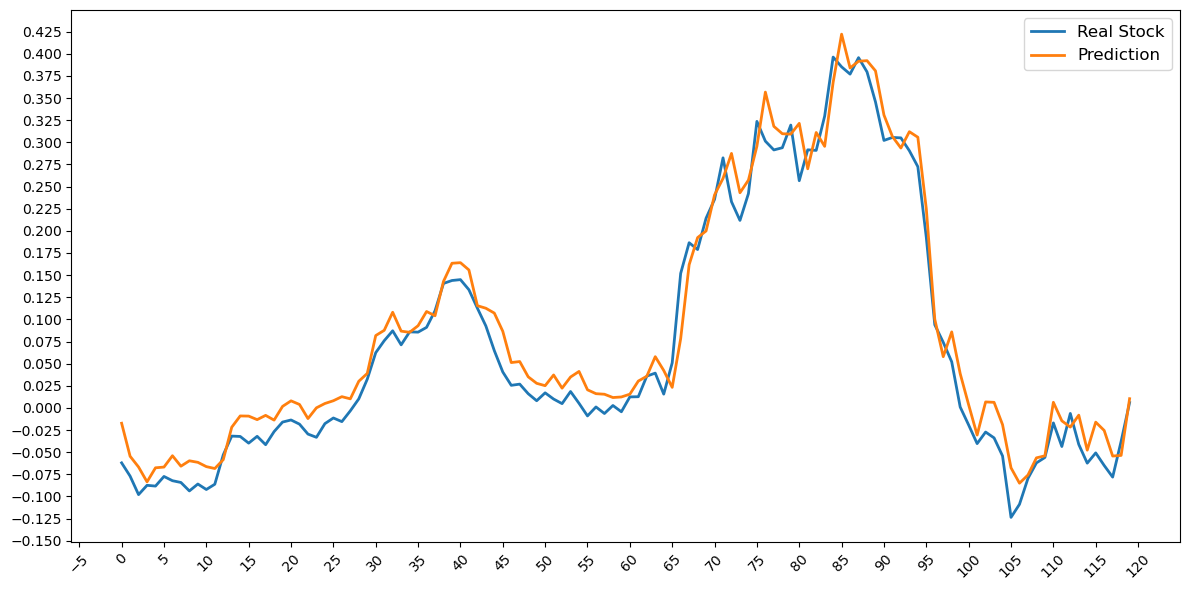

In [75]:
# 현대자동차
pred3 = model.predict(x_test3)

fig = plt.figure(facecolor='white', figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(y_test3, label='Real Stock', linewidth=2)
ax.plot(pred3, label='Prediction', linewidth=2)
ax.legend(fontsize='large')

ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.yaxis.set_major_locator(plt.MaxNLocator(30))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# +) 추가적 호기심 : 수치로 보기

4.24일 이후 30일 간의 주가 예측 수치로

In [68]:
last_batch = x_test1[-1:]
current_batch = last_batch

predicted_prices = []

# 30일간의 주가 예측하기
for i in range(30):  # 다음 30일간 예측

    current_prediction = model.predict(current_batch)[0]
    predicted_prices.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

predicted_prices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

[array([-0.1478745], dtype=float32),
 array([-0.12135213], dtype=float32),
 array([-0.0926108], dtype=float32),
 array([-0.06260584], dtype=float32),
 array([-0.03236606], dtype=float32),
 array([-0.00242374], dtype=float32),
 array([0.02693642], dtype=float32),
 array([0.05552468], dtype=float32),
 array([0.08318421], dtype=float32),
 array([0.10977934], dtype=float32),
 array([0.13520195], dtype=float32),
 array([0.15937923], dtype=float32),
 array([0.18227798], dtype=float32),
 array([0.20390186], dtype=float32),
 array([0.22428292], dtype=float32),
 array([0.24347362], dtype=float32),
 array([0.26153845], dtype=float32),
 array([0.27854663], dtype=float32),
 array([0.29456806], dtype=float32),
 array([0.30967018], dtype=float32),
 array([0.3239146], dtype=float32),
 array([0.33735818], dtype=float32),
 array([0.3500523], dtype=float32),
 array([0.36204264], dtype=float32),
 array([0.37337056], dtype=float32),
 array([0.38407362], dtype=float32),
 array([0.39418563], dtype=float32),

아니야. close 주가가 궁금한거였는데...

In [69]:
last_close_price = data1['Close'].iloc[-sequence_length]

predicted_close_prices = [(change[0] + 1) * last_close_price for change in predicted_prices]
prediction_dates = pd.date_range(start=data1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')

predicted_prices_with_dates = ["{} Close Price: {:.2f}".format(date.strftime('%Y-%m-%d'), price) 
                               for date, price in zip(prediction_dates, predicted_close_prices)]
predicted_prices_with_dates

['2024-04-24 Close Price: 151.48',
 '2024-04-25 Close Price: 156.20',
 '2024-04-26 Close Price: 161.31',
 '2024-04-27 Close Price: 166.64',
 '2024-04-28 Close Price: 172.02',
 '2024-04-29 Close Price: 177.34',
 '2024-04-30 Close Price: 182.56',
 '2024-05-01 Close Price: 187.64',
 '2024-05-02 Close Price: 192.56',
 '2024-05-03 Close Price: 197.29',
 '2024-05-04 Close Price: 201.80',
 '2024-05-05 Close Price: 206.10',
 '2024-05-06 Close Price: 210.17',
 '2024-05-07 Close Price: 214.02',
 '2024-05-08 Close Price: 217.64',
 '2024-05-09 Close Price: 221.05',
 '2024-05-10 Close Price: 224.26',
 '2024-05-11 Close Price: 227.29',
 '2024-05-12 Close Price: 230.14',
 '2024-05-13 Close Price: 232.82',
 '2024-05-14 Close Price: 235.35',
 '2024-05-15 Close Price: 237.74',
 '2024-05-16 Close Price: 240.00',
 '2024-05-17 Close Price: 242.13',
 '2024-05-18 Close Price: 244.14',
 '2024-05-19 Close Price: 246.05',
 '2024-05-20 Close Price: 247.84',
 '2024-05-21 Close Price: 249.54',
 '2024-05-22 Close P

In [70]:
predicted_changes = [
    -0.1478745, -0.12135213, -0.0926108, -0.06260584, -0.03236606,
    -0.00242374, 0.02693642, 0.05552468, 0.08318421, 0.10977934,
    0.13520195, 0.15937923, 0.18227798, 0.20390186, 0.22428292,
    0.24347362, 0.26153845, 0.27854663, 0.29456806, 0.30967018,
    0.3239146, 0.33735818, 0.3500523, 0.36204264, 0.37337056,
    0.38407362, 0.39418563, 0.40373752, 0.41275832, 0.42127517
]

In [72]:
start_date = pd.to_datetime('2024-04-24')

# 마지막 Close 주가 : 2024.04.23일
last_close_price = 144.679993

predicted_prices = [(change + 1) * last_close_price for change in predicted_changes]

predicted_dates = pd.date_range(start=start_date, periods=len(predicted_prices))

predicted_prices_with_dates = [f"{date.strftime('%Y-%m-%d')} Close Price: {price:.2f}" for date, price in zip(predicted_dates, predicted_prices)]
predicted_prices_with_dates

['2024-04-24 Close Price: 123.29',
 '2024-04-25 Close Price: 127.12',
 '2024-04-26 Close Price: 131.28',
 '2024-04-27 Close Price: 135.62',
 '2024-04-28 Close Price: 140.00',
 '2024-04-29 Close Price: 144.33',
 '2024-04-30 Close Price: 148.58',
 '2024-05-01 Close Price: 152.71',
 '2024-05-02 Close Price: 156.72',
 '2024-05-03 Close Price: 160.56',
 '2024-05-04 Close Price: 164.24',
 '2024-05-05 Close Price: 167.74',
 '2024-05-06 Close Price: 171.05',
 '2024-05-07 Close Price: 174.18',
 '2024-05-08 Close Price: 177.13',
 '2024-05-09 Close Price: 179.91',
 '2024-05-10 Close Price: 182.52',
 '2024-05-11 Close Price: 184.98',
 '2024-05-12 Close Price: 187.30',
 '2024-05-13 Close Price: 189.48',
 '2024-05-14 Close Price: 191.54',
 '2024-05-15 Close Price: 193.49',
 '2024-05-16 Close Price: 195.33',
 '2024-05-17 Close Price: 197.06',
 '2024-05-18 Close Price: 198.70',
 '2024-05-19 Close Price: 200.25',
 '2024-05-20 Close Price: 201.71',
 '2024-05-21 Close Price: 203.09',
 '2024-05-22 Close P